  
Ce notebook sert d'espace de travail principal pour le peojet NBA Durabilité. Il inclut l'exploration des données, le prétraitement, l'ingénierie des caractéristiques et les étapes de modélisation.

Ce notebook représente

**Compréhension du problème (Business Understanding)**

- Objectif : prédire si un joueur NBA jouera ≥ 5 ans à partir de ses statistiques de rookie.

- Enjeu métier : aider les investisseurs sportifs à repérer les talents durables → minimiser les faux négatifs (ne pas manquer une future star).

- Métrique clé : Recall (sensibilité) sur la classe « 1 = durable ».

# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization
5. Modeling
6. Conclusion
7. Perspectives d'amélioration
8. Enregistrement des modèles

---

## 1. Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

---

## 2. Loading data with Pandas

We need to load `nba_log_reg.csv` so we can work with it in Python

In [ ]:
# Load the data
data = pd.read_csv('./data/nba_logreg.csv')

# Display the first few rows of the dataset
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


---

## 3. Statistiques descriptives des données

### Types de données

Il est utile de comprendre d'abord les données dont nous disposons ainsi que les types de chaque colonne. Les types de données peuvent influencer la façon dont vous transformez et créez de nouvelles variables.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

Le jeu de données contient 1340 joueurs avec 21 caracteristiques (colonnes).

Toutes les variables sont numériques sauf la colonne `Name`


### Valeurs manquantes

In [10]:
data.isnull().sum()>0

Name           False
GP             False
MIN            False
PTS            False
FGM            False
FGA            False
FG%            False
3P Made        False
3PA            False
3P%             True
FTM            False
FTA            False
FT%            False
OREB           False
DREB           False
REB            False
AST            False
STL            False
BLK            False
TOV            False
TARGET_5Yrs    False
dtype: bool

Valeurs manquantes : uniquement dans ``3P% (11 valeurs ≈0,8 % des données)``  — logique car certains rookies n’ont jamais tenté de tir à 3 points.

Le taux de données manquantes est statistiquement négligeable, donc une imputation par 0.0 ne dégradera pas la variance ni les corrélations globales. En plus, la colonne 3P% est déterminée par les colonnes 3P et 3PA qui ont des valeurs nulles.

In [ ]:
# # showing data with null values
# data_with_nulls =data[data.isnull().any(axis=1)]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


### Statistique Descriptive

In [5]:
# Annalyse descriptive statistics
data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


La dispersion élevée sur les volumes (matchs, points, minutes, rebonds) traduit une forte hétérogénéité des performances de rookies.

On observe une asymetrie à droite très importante pour les variables points, minutes, assists, rebonds (légère asymetrie) --> La plupart des rookies ont de modeste stats mais peu ont des stats assez élévées

Les valeurs extrêmes (max) sont souvent très éloignées du Q3, signe de présence d’outliers naturels (superstars ou anomalies statistiques).
--> Ces valeurs ne doivent pas être supprimées : elles représentent des joueurs atypiques, justement intéressants pour la prédiction de durabilité.


---

## 4. Data visualization

### Target_5Yrs

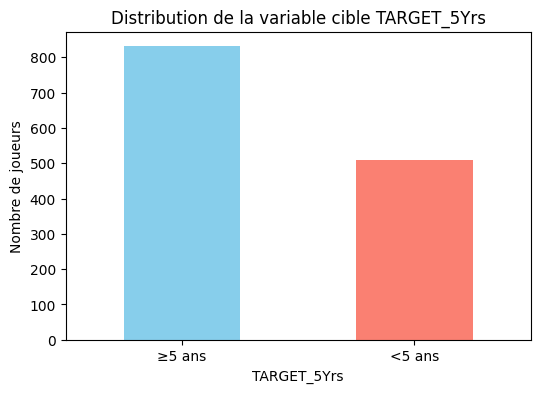

In [6]:
# Analyse du Target
target_data = data['TARGET_5Yrs'].value_counts()
plt.figure(figsize=(6,4))
target_data.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution de la variable cible TARGET_5Yrs')
plt.xlabel('TARGET_5Yrs')
plt.ylabel('Nombre de joueurs')
plt.xticks([0, 1], ["≥5 ans", "<5 ans"], rotation=0)
plt.show()


Distribution de la cible

- 1 (≥ 5 ans en NBA) : 62 %

- 0 (< 5 ans en NBA) : 38 %
--> Dataset modérément déséquilibré → utilisation de class_weight="balanced" justifiée.

### Moyenne des variables numériques

TARGET_5Yrs        0.0        1.0     diff_%
BLK           0.253438   0.439110  73.261038
FTM           0.923379   1.526955  65.366029
OREB          0.718271   1.187726  65.358957
FTA           1.321611   2.128400  61.045838
FGM           1.946169   3.047413  56.585210
REB           2.247544   3.516486  56.459043
PTS           5.042829   7.878700  56.235721
DREB          1.531238   2.328640  52.075681
FGA           4.542043   6.708063  47.688215
AST           1.221022   1.752347  43.514788
TOV           0.942240   1.347533  43.013833
STL           0.498232   0.692178  38.926913
MIN          14.252259  19.690253  38.155308
GP           51.577603  65.826715  27.626549
3P Made       0.229666   0.258604  12.600071


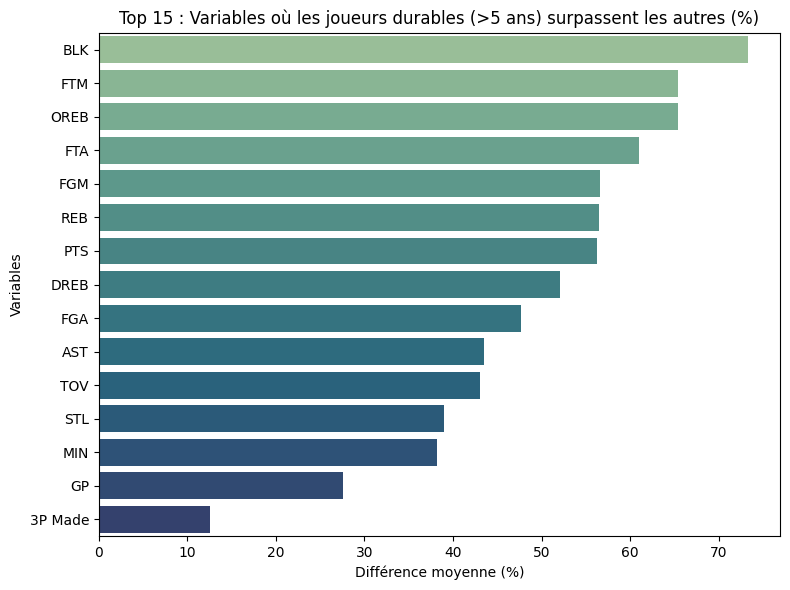

In [7]:
# Moyenne des statistiques selon la durabilité du joueur
group_means = data.groupby("TARGET_5Yrs").mean(numeric_only=True).T
group_means["diff_%"] = 100 * (group_means[1] - group_means[0]) / group_means[0].replace(0, np.nan)

print(group_means.sort_values(by="diff_%", ascending=False).head(15))

# Visualisation des différences moyennes entre groupes
diff_sorted = group_means["diff_%"].sort_values(ascending=False).head(15)
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=diff_sorted.values, y=diff_sorted.index, palette="crest", ax=ax)
plt.title("Top 15 : Variables où les joueurs durables (>5 ans) surpassent les autres (%)")
plt.xlabel("Différence moyenne (%)")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

Les moyennes par cible montrent :

Les joueurs durables (>5 ans) ont en moyenne plus de minutes, plus de points, plus de rebonds et d’assists.

### Distribution univariée des variables numériques

In [8]:
# Remplacement des NaN (3P%) par 0
data = data.fillna(0.0)

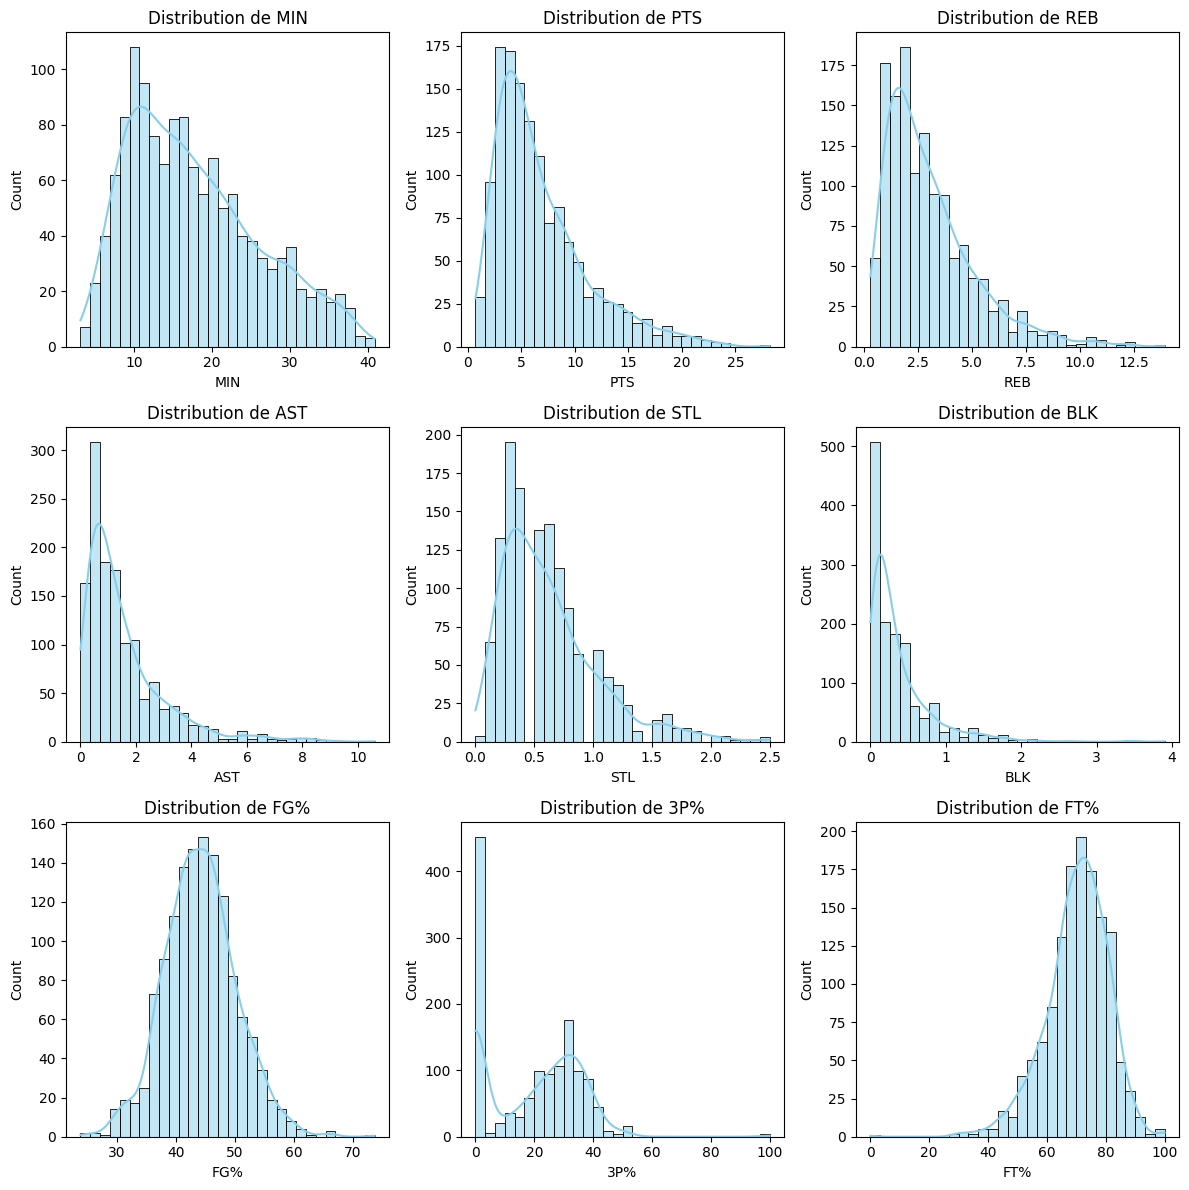

In [9]:
# Visualisation des distributions des variables numériques
key_features = ['MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%']
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()
for i, feature in enumerate(key_features):
    sns.histplot(data[feature], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution de {feature}') 
    # axes[i].set_xlabel(feature)
    # axes[i].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()


On voit clairement une asymetrie à droite marqueée pour les variables `PTS, MIN, REB, AST`.--> une majorité de joueurs avec de faibles valeurs et une minorité de joueurs “élite” avec des performances extrêmes. J'appliquerai des transformation adaptées à ces colonnes.

Statistiquement, la distribution suit une loi log-normale, typique des performances humaines.

Les variables ``FG%, FT%, 3P%`` sont bornées entre 0 et 1, avec des distributions plus symétriques et une variance plus faible.--> Ces indicateurs sont stables avec une faibledispersion entre les joueurs

Les valeurs aux extrémités de la distribution sont probablement des outliers naturels. Nous pouvons utiliser un graphique standard pour visualiser ces valeurs atypiques plus en détail. Un boxplot (boîte à moustaches) est une méthode standardisée pour afficher la distribution.
Il permet de révéler les outliers et leurs valeurs. Il indique également si les données sont symétriques, comment elles sont regroupées et si elles sont asymétriques. Mais je vais m'arrêter court ici

### Distribution en les groupes de joueurs

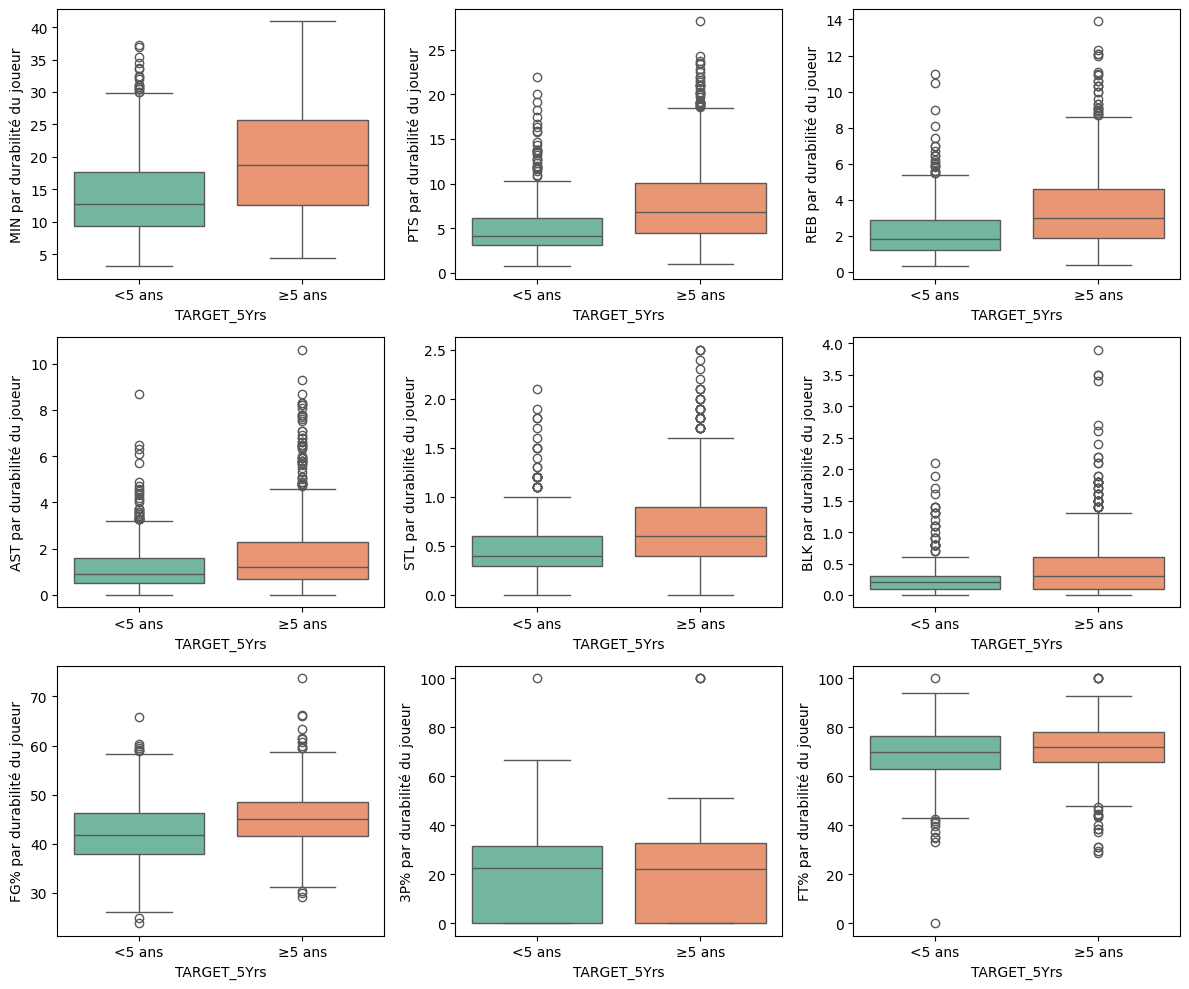

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()
for i, feature in enumerate(key_features):
    sns.boxplot(x='TARGET_5Yrs', y=feature, data=data, ax=axes[i], palette="Set2")
    axes[i].set_xticklabels(["<5 ans", "≥5 ans"])
    axes[i].set_ylabel(f"{feature} par durabilité du joueur")
plt.tight_layout()
plt.show()

- Les joueurs durables (≥5 ans) ont :

    - une médiane plus élevée pour MIN, PTS, REB, AST, STL, BLK,

    - une dispersion plus large, indiquant une diversité de profils rookie (certains très performants, d’autres moyens mais stables).

- Les joueurs non durables (<5 ans) ont des distributions plus resserrées vers des valeurs faibles


### Corrélation


Text(0.5, 1.0, 'Matrice de corrélation des statistiques')

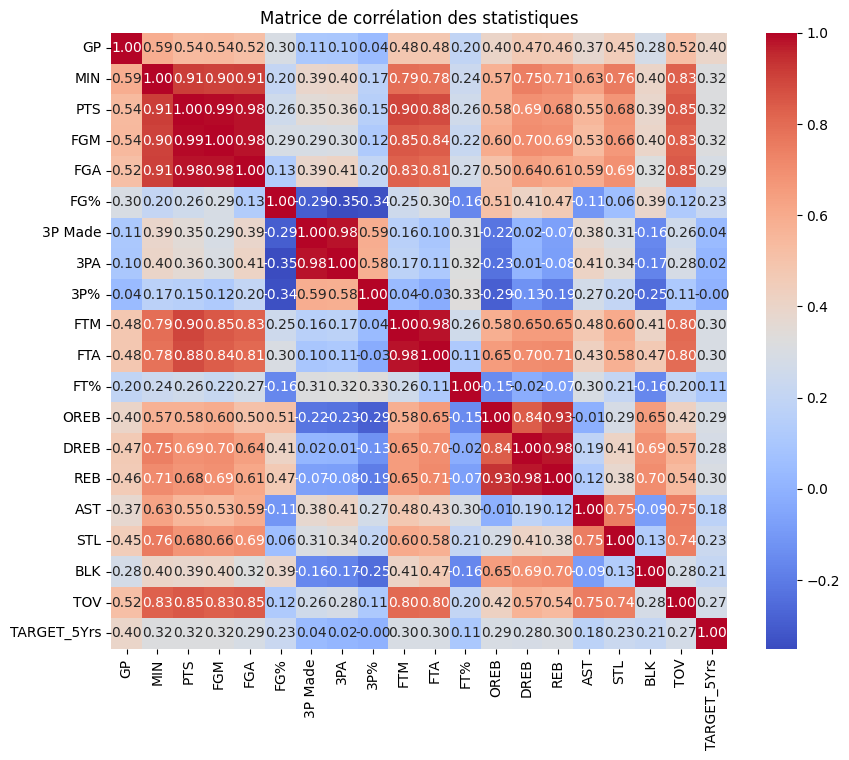

In [11]:
# Corréalation entre variables
plt.figure(figsize=(10, 8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matrice de corrélation des statistiques')   

Peu de corrélation directe avec TARGET_5Yrs (Ce qui est peu logique car la durabilité dépend d’un ensemble de facteurs combinés)

Je peux conclure après cette analyse exploratoire que
La probabilité qu’un joueur dure plus de 5 ans en NBA dépend fortement de son exposition au jeu (minutes, matchs) et de sa production globale (points, rebonds, passes), plutôt que de son efficacité technique pure (FG%, FT%, 3P%)

---

## Feature Engineering



### Cleaning

In [12]:
def clean(df):
    df_cleaned = df.copy()
    df_cleaned.fillna(0.0, inplace=True)
    return df_cleaned

### Creation de nouvelles variables

J'ai pensé à plusieurs variables explicatives qu'on peut dériver des colonnes à notre dispostion

- Efficacité offensive par minute — mesure la productivité d’un joueur indépendamment de son temps de jeu.
Un joueur qui marque beaucoup dans un temps limité est plus performant, donc plus susceptible de durer.
- Qualité de décision — évalue la capacité du joueur à créer sans perdre de ballons.
Un ratio élevé reflète une intelligence de jeu et une meilleure adaptation aux exigences NBA.
- Activité défensive et présence au rebond — reflète l’intensité et la combativité sur le terrain.
Les joueurs actifs défensivement sont souvent plus polyvalents et utiles aux équipes.
- Charge offensive relative — mesure combien d’actions un joueur initie par minute (tirs, fautes provoquées, pertes de balle).
Un usage élevé indique un rôle offensif central, souvent réservé aux talents majeurs.
- Efficacité globale au tir — moyenne des pourcentages de réussite sur les tirs à deux points, à trois points et aux lancers francs.
Une bonne précision technique est un indicateur de constance et de durabilité potentielle.
- Indice de performance offensive(OFF_INDEX) : Mesure la contribution d'un joueur à l'attaque
- Indice d'efficacité offensive(OFF_EFF_INDEX) : Combine l'efficacité au tir et la production par minute
- Indice défensif : Combine les actions défensives mesurables
- Indice d'activité totale : Mesure la polyvalence golable
- Ratio d'équilibre : Rapport entre activité offensive et défensive
- Indice de staibilité : combine la qualité et la propreté du jeu


In [13]:
# ajout de nouvelles variables
def add_new_features(df):
    df = df.copy()
    # Efficacité offensive par minute
    df['EFFICIENCY_PTS'] = df['PTS']/ (df['MIN'] + 1e-5)  # Ajout d'une petite constante pour éviter la division par zéro   

    # Qualité de decision
    df['AST_TOV_RATIO'] = (df['AST'] / (df['TOV'] + 1) )  # Ajout de 1 pour éviter la division par zéro
    
    # Activité défensive par minute
    df['REB_PER_MIN'] = df['REB'] / (df['MIN']+ 1e-5)

    # Charge offensive relative
    df['USAGE'] = (df['FGA'] + 0.44 * df['FTA']) / (df['MIN'] + 1e-5)  # Ajout d'une petite constante pour éviter la division par zéro

    # Efficacité globale au tir
    df['SHOOTING_ACCURACY'] = (df['FG%'] + df['3P%'] + df['3P%']) / 3

    # # Ajout des indices composites
    # # indice de performance, d'efficacité offensive, défensive, activité totale, équilibre et stabilité
    df["OFF_INDEX"] = 0.4*df["PTS"] + 0.2*df["AST"] + 0.2*df["FGM"] + 0.2*df["FTM"]
    
    df["OFF_EFF_INDEX"] = 0.5*df["EFFICIENCY_PTS"] + 0.25*df["FG%"] + 0.25*df["FT%"]
    df["DEF_INDEX"] = 0.4*df["REB"] + 0.3*df["STL"] + 0.3*df["BLK"]
    df["ACTIVITY_INDEX"] = df["OFF_INDEX"] + df["DEF_INDEX"]
    df["BALANCE_RATIO"] = df["OFF_INDEX"] / (df["DEF_INDEX"] + 1e-9)
    df["CONSISTENCY_INDEX"] = (
        0.5 * df["AST_TOV_RATIO"] +
        0.25 * df["SHOOTING_ACCURACY"] +
        0.25 * (1 - (df["TOV"] / (df["GP"] + 1e-9)))
    )

    
    return df

In [14]:
data_engineered = data.copy()
data_engineered = clean(data_engineered)
data_engineered = add_new_features(data_engineered)

### Transformation des colonnes

Les asymétries observées dans les distributions sont naturelles et informatives donc je n'aurai pas besoin d'une transformation majeure (log or root square), une normalisation minMaxscaler suffirait pour reduire les asymetries.

Idéalement, il fallait utiliser un logarithme ou un root square pour reduire les asymetries pour des modèles lineaires comme SVM et regression logistique. Mais dans ce cas pécis, je vais m'atteler seulement sur la normalisation pour réduire les asymetries.

In [15]:
# Visualisation des distributions des variables numériques
def distribution_plots(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    plt.figure(figsize=(18, 16))
    for i, col in enumerate(numeric_cols):
        plt.subplot(5, 5, i + 1)
        sns.histplot(df[col], bins=30, kde=True, color='skyblue')
        plt.title(f'Distribution de {col}')
        plt.xlabel(col)
        plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()

In [16]:
# statistics before scaling
data_engineered.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,AST_TOV_RATIO,REB_PER_MIN,USAGE,SHOOTING_ACCURACY,OFF_INDEX,OFF_EFF_INDEX,DEF_INDEX,ACTIVITY_INDEX,BALANCE_RATIO,CONSISTENCY_INDEX
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,...,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.149627,1.297687,...,0.633685,0.171494,0.370518,27.489552,3.816060,28.802964,1.509918,5.325978,2.848736,7.434247
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.051861,0.987246,...,0.429905,0.073439,0.087068,10.196458,2.428406,2.853510,0.968922,3.175141,1.354865,2.623950
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.040000,0.112405,9.000000,0.380000,6.702419,0.180000,0.760000,0.556701,2.608333
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,...,0.318182,0.107651,0.306925,17.158333,2.055000,27.281838,0.780000,2.917500,1.780259,4.740003
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,1.000000,...,0.521739,0.159882,0.364485,28.716667,3.120000,29.152094,1.290000,4.485000,2.575022,7.835944
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,...,0.846737,0.229146,0.426176,35.550000,4.885000,30.720156,1.970000,6.832500,3.723815,9.567607
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,...,2.585366,0.419354,0.802855,86.366667,16.040000,39.179808,6.820000,19.780000,9.111111,22.005616


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Select only numeric columns for scaling (excluding 'Name')
numeric_features = data_engineered.select_dtypes(include=[np.number]).columns.tolist()
data_scaled = data_engineered.copy()
data_scaled[numeric_features] = scaler.fit_transform(data_scaled[numeric_features])

In [18]:
# skewed_features = ['PTS', 'REB', 'AST', 'STL', 'BLK', 'FGA', 'FTA', '3PA']
# # log transformation
# data_scaled_linear = data_scaled.copy()
# for feature in skewed_features:
#     data_scaled_linear[feature] = np.sqrt(data_scaled_linear[feature])  # log1p pour gérer les zéros 
# # distribution_plots(data_scaled_linear)

In [19]:
# statistics after scaling
data_scaled.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,AST_TOV_RATIO,REB_PER_MIN,USAGE,SHOOTING_ACCURACY,OFF_INDEX,OFF_EFF_INDEX,DEF_INDEX,ACTIVITY_INDEX,BALANCE_RATIO,CONSISTENCY_INDEX
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,...,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,0.695974,0.384249,0.221872,0.235263,0.267647,0.408204,0.107657,0.119874,0.191496,0.168531,...,0.245105,0.346627,0.373834,0.238986,0.219416,0.680490,0.200289,0.240062,0.267936,0.248793
std,0.245549,0.219787,0.158456,0.170056,0.189131,0.123000,0.166821,0.163361,0.160519,0.128214,...,0.166284,0.193590,0.126103,0.131794,0.155071,0.087861,0.145922,0.166937,0.158382,0.135274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.507042,0.205688,0.109091,0.111111,0.131579,0.328657,0.000000,0.000000,0.000000,0.077922,...,0.123070,0.178332,0.281730,0.105450,0.106960,0.633654,0.090361,0.113433,0.143032,0.109895
50%,0.732394,0.343915,0.176364,0.181818,0.210526,0.406814,0.043478,0.046154,0.222000,0.129870,...,0.201805,0.316015,0.365095,0.254847,0.174968,0.691240,0.167169,0.195846,0.235939,0.269502
75%,0.929577,0.523810,0.294545,0.313131,0.352632,0.482966,0.173913,0.184615,0.325000,0.207792,...,0.327511,0.498601,0.454444,0.343171,0.287676,0.739522,0.269578,0.319269,0.370232,0.358776
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


On peut constater que l'écart-type de la majorité des colonnes est bien plus faible après le scaling --> ces colonnes sont desormais beacup plus stables et predictives

In [20]:
# distribution_plots(data_scaled)

Text(0.5, 1.0, 'Matrice de corrélation après scaling')

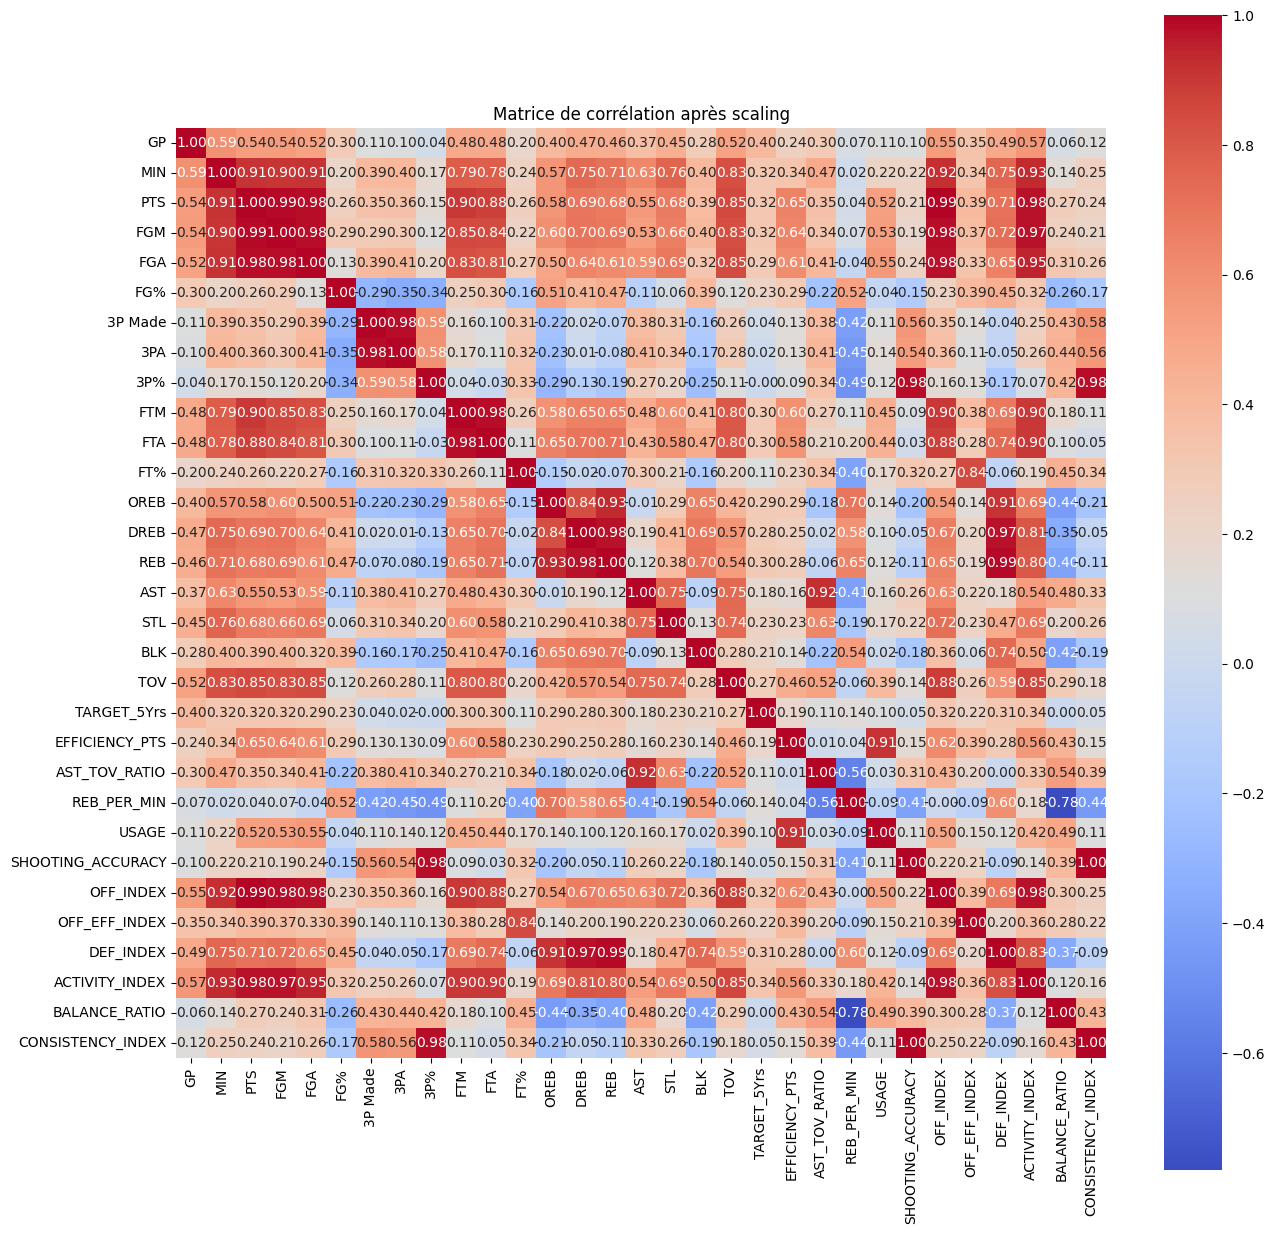

In [21]:
#correlation
plt.figure(figsize=(15, 15))
corr_scaled = data_scaled.corr(numeric_only=True)   
sns.heatmap(corr_scaled, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matrice de corrélation après scaling')


La multicolinéarité observée n’est pas problématique pour les modèles d’arbres envisagés, mais devra être prise en compte si l’on retient un modèle linéaire.

---

## 5. Modeling

Nous sommes face à un problème de classification binaire où l’objectif principal est de détecter les talents durables sans en manquer. Cela implique d’optimiser le modèle pour réduire les faux négatifs, c’est-à-dire maximiser la sensibilité (Recall). Je vais également m'intereser à la métrique f1_score pour que la précisoin de mon modèle soit très faile

La démarche consiste à établir une régression logistique comme modèle de référence (baseline), puis à comparer ses performances avec celles d’autres algorithmes : SVM, RandomForestClassifier et XGBoostClassifier, afin de sélectionner le modèle le plus performant.

In [22]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    precision_recall_fscore_support, roc_auc_score
)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [23]:
scaler = MinMaxScaler()
X= data_engineered.drop(columns=['Name', 'TARGET_5Yrs'])
X[X.columns] = scaler.fit_transform(X)
y = data_engineered['TARGET_5Yrs'].copy().astype(int)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

### Baseline model

In [25]:
# Baseline model
### Logistic Regression
model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.71      0.65        51
           1       0.80      0.72      0.76        83

    accuracy                           0.72       134
   macro avg       0.71      0.71      0.71       134
weighted avg       0.73      0.72      0.72       134



### Validation croisée + Sélection du meilleur modèle

Cette étape vise à identifier le meilleur modèle parmi une sélection de modèles prometteurs.
J’utilise la validation croisée sur X_train et la méthode GridSearch pour optimiser les hyperparamètres de chaque algorithme.
La sélection finale repose sur la métrique de recall, afin de maximiser la détection des joueurs durables (minimiser les faux négatifs).

In [26]:
# Calculate scale_pos_weight for XGBClassifier
scale_pos_weight = (y == 0).sum() / (y== 1).sum()

# 4) Build candidate models (recall-focused)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipelines = {
    "logreg_balanced": Pipeline([
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear"))
    ]),
    "svm" : Pipeline([
        ("clf", SVC(class_weight="balanced", probability=True, random_state=42))
    ]),
    "random_forest": Pipeline([
        ("clf", RandomForestClassifier(class_weight="balanced", random_state=42))
    ]),
    "grad_boost": Pipeline([
        ("clf", XGBClassifier(
                objective="binary:logistic",
                eval_metric="logloss",
                random_state=42,
                scale_pos_weight=scale_pos_weight,
                tree_method="hist",
                verbosity=0
            ))
    ]),
    "light_gbm": Pipeline([
        ("clf", LGBMClassifier(
                objective="binary",
                random_state=42,
                is_unbalance=True
            ))  
    ])
}

param_grids = {
    "logreg_balanced": {
        "clf__C": [0.1, 0.5, 1.0, 2.0, 5.0],
        "clf__penalty": ["l1", "l2"]
    },
    "svm": {
        "clf__C": [0.1, 1.0, 10.0],
        "clf__kernel": ["linear", "rbf"],
        "clf__gamma": ["scale", "auto"]
    },
    "random_forest": {
        "clf__n_estimators": [200, 500],
        "clf__max_depth": [None, 5, 10],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 5]
    },
    "grad_boost": {
        "clf__n_estimators": [200, 500],
        "clf__learning_rate": [0.01, 0.05, 0.1],
        "clf__max_depth": [3, 5],
        "clf__subsample": [0.8, 1.0],
        "clf__colsample_bytree": [0.8, 1.0],
    },
    "light_gbm": {
        "clf__n_estimators": [200, 500],
        "clf__learning_rate": [0.01, 0.05, 0.1],
        "clf__num_leaves": [31, 63],
        "clf__max_depth": [-1, 10],
        "clf__subsample": [0.8, 1.0]
    }
}

results = []
best_estimators = {}

for name, pipe in pipelines.items():
    grid = GridSearchCV(
        pipe, 
        param_grids[name], 
        scoring="recall", 
        cv=cv, 
        n_jobs=-1,
        refit=True
    )
    grid.fit(X_train, y_train)
    best_estimators[name] = grid.best_estimator_
    results.append({
        "model": name,
        "best_params": grid.best_params_,
        "cv_mean_recall": grid.best_score_
    })
results_df = pd.DataFrame(results)
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 748, number of negative: 458
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4589
[LightGBM] [Info] Number of data points in the train set: 1206, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.620232 -> initscore=0.490534
[LightGBM] [Info] Start training from score 0.490534
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [27]:
results

[{'model': 'logreg_balanced',
  'best_params': {'clf__C': 0.1, 'clf__penalty': 'l1'},
  'cv_mean_recall': 0.6979149888143177},
 {'model': 'svm',
  'best_params': {'clf__C': 1.0,
   'clf__gamma': 'scale',
   'clf__kernel': 'linear'},
  'cv_mean_recall': 0.6885816554809843},
 {'model': 'random_forest',
  'best_params': {'clf__max_depth': None,
   'clf__min_samples_leaf': 1,
   'clf__min_samples_split': 2,
   'clf__n_estimators': 200},
  'cv_mean_recall': 0.8208859060402685},
 {'model': 'grad_boost',
  'best_params': {'clf__colsample_bytree': 1.0,
   'clf__learning_rate': 0.05,
   'clf__max_depth': 5,
   'clf__n_estimators': 500,
   'clf__subsample': 0.8},
  'cv_mean_recall': 0.7486621923937361},
 {'model': 'light_gbm',
  'best_params': {'clf__learning_rate': 0.1,
   'clf__max_depth': 10,
   'clf__n_estimators': 500,
   'clf__num_leaves': 63,
   'clf__subsample': 0.8},
  'cv_mean_recall': 0.7714093959731543}]

Après entrainenement, le modèle le plus performant est le randomForest avec un recall de 82% --> Le modèle détecte correctement 82% des joueurs durables (classe 1). C’est très bon pour l’objectif métier : minimiser les faux négatifs.

Il faut retenir que ee RandomForest est robuste aux outliers, à la multicolinéarité et aux asymetries, ce qui est adapté à ce dataset.

Maintenant, je vais procéder à l'évalution du modèle sur le jeu de donné de test. D'ailleurs, je vais le faire pour tous les modèles pour voir, à quoi resemble la précision, le f1-score et le auroc score

### Evaluation on the test data for the best model (in fact on all models)

In [28]:
# Evaluation on the test data for the best model (in fact on all models)
# table containing precision, recall, f1-score and auroc for each model
eval_results = []
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    auroc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    eval_results.append({
        "model": name,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "auroc": auroc
    })
eval_results_df = pd.DataFrame(eval_results).sort_values(by="recall", ascending=False)
print(eval_results_df)

             model  precision    recall  f1_score     auroc
2    random_forest   0.741935  0.831325  0.784091  0.739428
4        light_gbm   0.739130  0.819277  0.777143  0.710843
3       grad_boost   0.773810  0.783133  0.778443  0.732577
0  logreg_balanced   0.775000  0.746988  0.760736  0.748405
1              svm   0.797297  0.710843  0.751592  0.763997


On confirme avec cette évaluation que le modèle random_forest est le meilleur pour ton objectif (maximiser la détection des joueurs durables), car il a le meilleur recall et un excellent F1-score. 

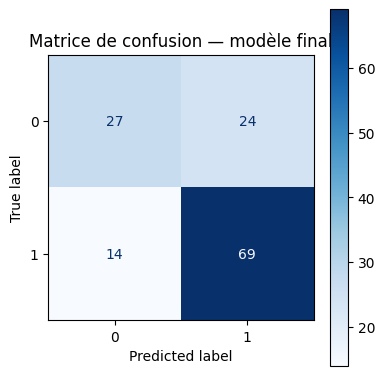

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

# # Visualisation matrice de confusion pour le meilleur modèle
best_name = "Random Forest"
best_model = best_estimators["random_forest"]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(cmap="Blues", ax=ax)
plt.title("Matrice de confusion — modèle final")
plt.tight_layout()
plt.show()

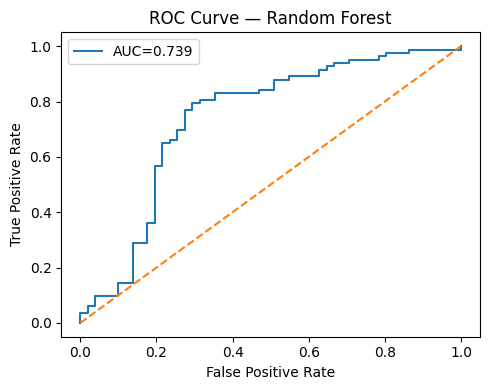

In [30]:
# Roc curve for the best model (Random Forest)
best_name = "Random Forest"
best_model = best_estimators["random_forest"]
y_proba = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
from sklearn.metrics import roc_curve
if np.unique(y_proba).size > 1:
    fpr, tpr, th = roc_curve(y_test, y_proba)
    fig_roc, ax_roc = plt.subplots(figsize=(5,4))
    ax_roc.plot(fpr, tpr, label=f"AUC={auc:.3f}")
    ax_roc.plot([0,1],[0,1], linestyle="--")
    ax_roc.set_xlabel("False Positive Rate")
    ax_roc.set_ylabel("True Positive Rate")
    ax_roc.set_title(f"ROC Curve — {best_name}")
    ax_roc.legend()
    plt.tight_layout()
    plt.show()

Un AUC de 0.73 indique que mon modèle a une bonne capacité à séparer les deux classes (durable vs non durable). Plus la courbe est proche du coin supérieur gauche, meilleur est le modèle.

### Interprétation du modèle final

Dans cette partie, je veux determiner les facteurs les plus determinants dans la durabilité d'un joueur. Qu'est ce qui fait durer un joueur?

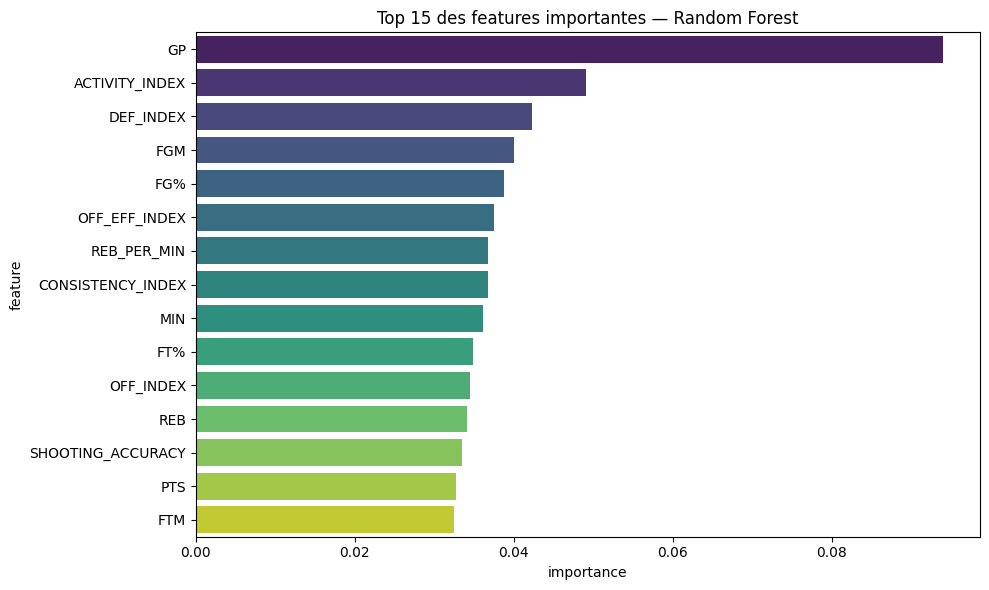

In [31]:
# Feature importance for the best model (Random Forest)
importances = best_model.named_steps['clf'].feature_importances_    
feature_names = X.columns
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feat_imp_df.head(15), palette="viridis")
plt.title(f'Top 15 des features importantes — {best_name}') 
plt.tight_layout()
plt.show()

L’analyse des importances de variables issues du modèle Random Forest met en évidence une hiérarchie claire dans les facteurs expliquant la durabilité d’un joueur NBA.
Les variables les plus influentes sont majoritairement liées au volume de jeu et à la productivité :

- GP (Games Played) ressort comme la variable la plus déterminante. Le nombre de matchs disputés lors de la saison rookie reflète directement la confiance accordée par le staff et la capacité d’un joueur à s’intégrer rapidement dans la rotation d’équipe.

- les indices ACTIVITY_INDEX et DEF_INDEX se positionnent parmi les plus influents, aux côtés du nombre de matchs joués (GP), confirmant l’intérêt d’une approche combinant volume et polyvalence.

- Le CONSISTENCY_INDEX apporte également un signal pertinent de fiabilité : il met en avant la régularité et la maîtrise du jeu (faible taux de pertes de balle, efficacité constante).

- PTS (Points), FGM (Field Goals Made) et MIN (Minutes jouées) suivent logiquement : ils traduisent le niveau d’implication et de performance offensive, indicateurs clés de la valeur d’un joueur sur le long terme.

- REB_PER_MIN occupe une place importante : cette variable dérivée capte l’intensité et la présence défensive relative d’un joueur, indépendamment de son temps de jeu, ce qui en fait un marqueur robuste de polyvalence.

Les variables d’efficacité technique (FT%, FG%, SHOOTING_ACCURACY) apparaissent également, mais avec un poids modéré.
Elles contribuent à la stabilité du modèle sans pour autant constituer des leviers principaux de prédiction. Cela confirme que la durabilité en NBA dépend davantage du volume et de l’impact global que de la pure efficacité au tir.

les indicateurs de gestion du jeu (AST_TOV_RATIO, USAGE) présentent des importances plus faibles, mais restent cohérents : ils apportent une lecture qualitative complémentaire, associée à la maturité décisionnelle du joueur.

**les joueurs les plus impliqués, productifs et actifs dès leur saison de rookie sont aussi ceux qui ont les plus fortes chances de durer plus de cinq ans en NBA.**

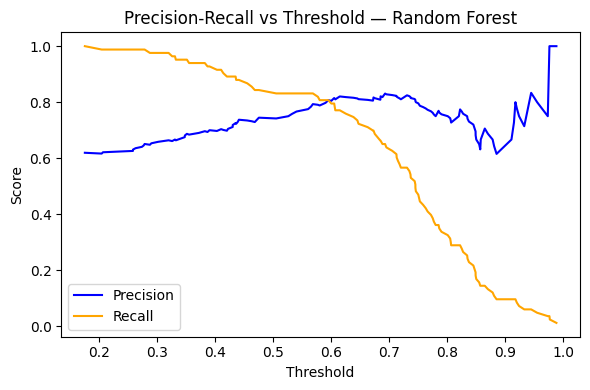

In [39]:
# Precision and recall curve against thresholds for the best model (Random Forest)
from sklearn.metrics import precision_recall_curve
y_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
fig_pr, ax_pr = plt.subplots(figsize=(6, 4))
ax_pr.plot(thresholds, precision[:-1], label='Precision', color='blue')
ax_pr.plot(thresholds, recall[:-1], label='Recall', color='orange')
ax_pr.set_xlabel('Threshold')
ax_pr.set_ylabel('Score')
ax_pr.set_title(f'Precision-Recall vs Threshold — {best_name}')
ax_pr.legend()
plt.tight_layout()
plt.show()


In [43]:
precision[:-1].size

131

---

## 6. Conclusion

Les résultats obtenus montrent une forte cohérence entre la logique statistique et la réalité du terrain NBA :

La durabilité d’un joueur dépend avant tout de son niveau d’engagement et de production dès la première saison (minutes, points, rebonds).

Les variables d’efficacité technique (taux de réussite aux tirs, lancers francs, 3 points) ont un impact plus secondaire.

Les features dérivées telles que REB_PER_MIN, EFFICIENCY_PTS ou USAGE ont permis de mieux discriminer les profils efficaces malgré un temps de jeu réduit, améliorant la sensibilité du modèle.

Le modèle Random Forest a offert le meilleur compromis recall/précision, grâce à sa robustesse face à la multicolinéarité et à l’asymétrie naturelle des données sportives.

---


## 7. Perspectives d'amélioration

Pour ce qui est de l'esplicabilité, on a la possibilité de complèter l'analyse avec des outils de d'explicabilité locale  omme SHAP afin d'interpréter les décisions individuelles du modèle ( expliquer pourquoi un joueur précis serait classé durable parexemple).
Pour l'amelioration du modèle, on peut
- élargir notre jeu de données en intégrant plusieurs saisons ou d'autres cohortes de joeurs pour diminuer le biais génerationnel
- efficaité panier par rapport àl'éauipe
- ajouter des variables contextuelles (âge, position sur le terrain, equipe draftée)
- Faire de la séléction par importance en se basant sur les resulats obtenus précedemment

## 8. Enregistrement des modèles

In [32]:
# Saving the model + artifacts for API use
import joblib
import json
import pickle

#joblib.dump(best_estimators['random_forest'], 'random_forest_model.pkl')

# saving the best model (random forest)
with open('nba_final_model.pkl', 'wb') as f:
    pickle.dump(best_estimators['random_forest'], f)

feature_names = X.columns.tolist()
with open('feature_names.json', 'w') as f:
	json.dump(feature_names, f)

bundle = {
    "scaler": scaler,
    "feature_names": feature_names
}

with open("scaler.pkl", "wb") as f:
    pickle.dump(bundle, f)


# Interpretabilité des prédictions

In [33]:
# Créer l'explainer SHAP pour le modèle rf basé sur des arbres
import shap
explainer = shap.Explainer(model.named_steps["clf"] if "clf" in model.named_steps else model, X_test, model_output="probability")
shap_values = explainer(X_test)

In [34]:
X_test_raw = scaler.inverse_transform(X_test)
X_test_raw = pd.DataFrame(X_test_raw, columns=X_test.columns)

shap_expl = shap.Explanation(values=shap_values.values,
                            base_values=shap_values.base_values,   
                            data=X_test_raw.values,
                            feature_names=X_test.columns)


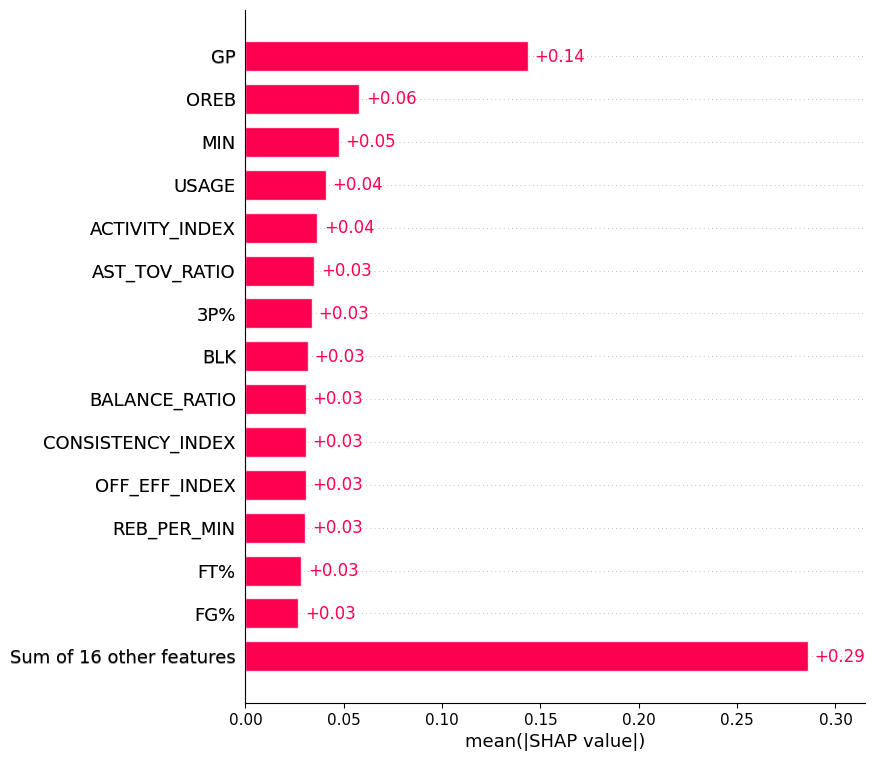

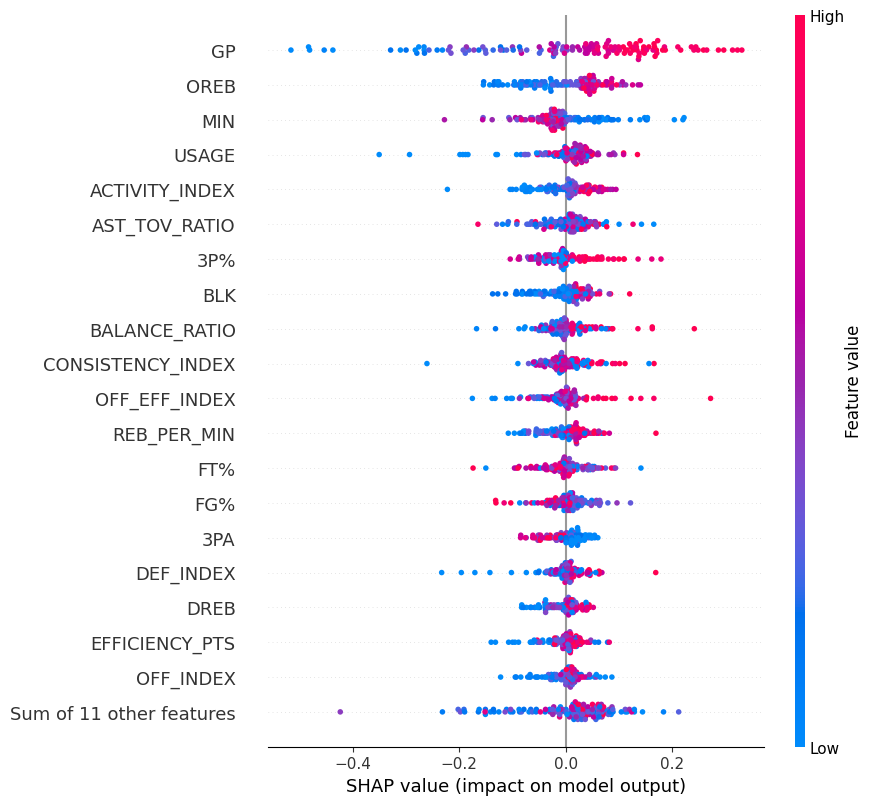

In [35]:
# --- 1️Visualisation globale ---
# Top features (bar) 

shap.plots.bar(shap_expl, max_display=15)

# # Distribution par feature (beeswarm)
shap.plots.beeswarm(shap_expl, max_display=20)


901it [00:12, 14.27it/s]                         


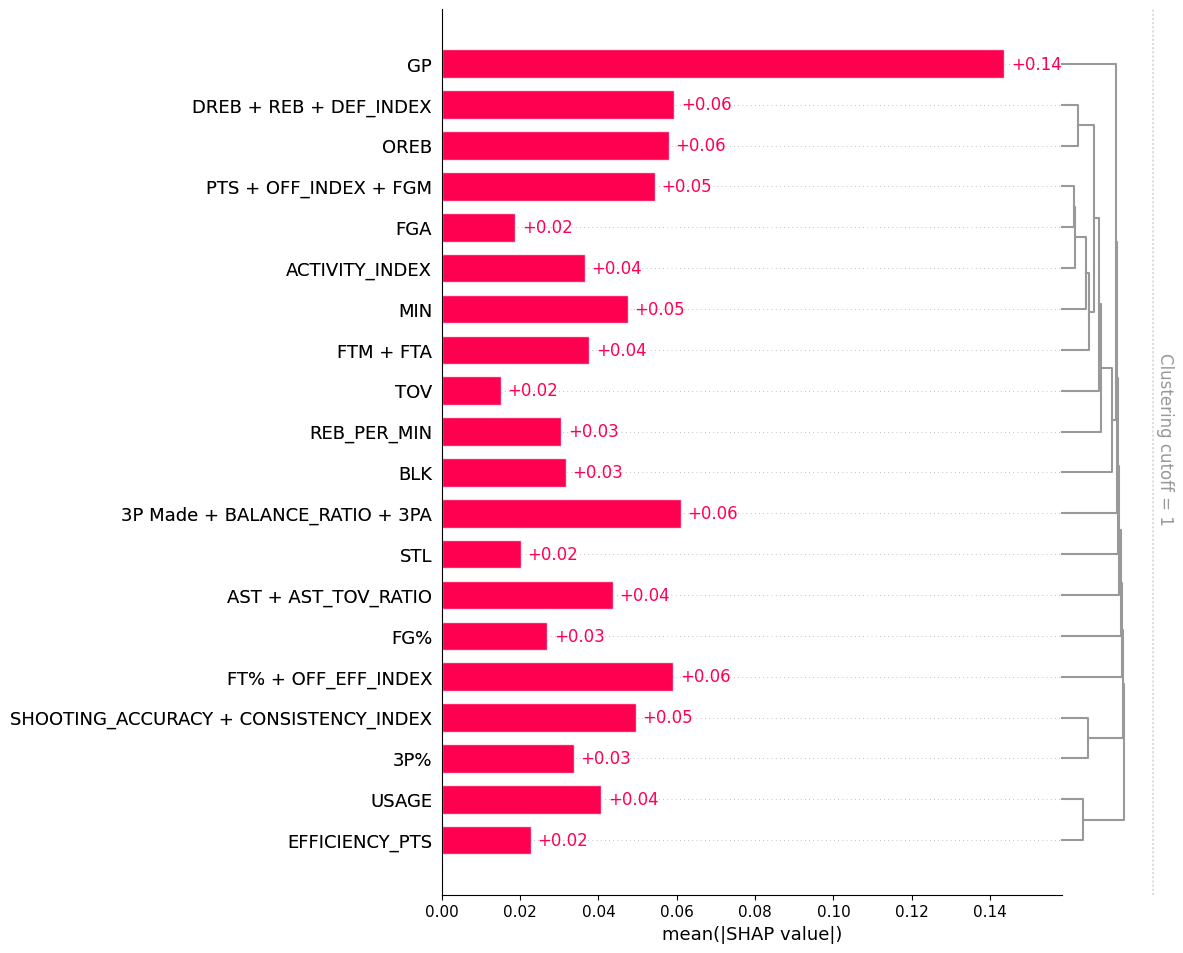

In [36]:
clust = shap.utils.hclust(X_test, y_test, linkage="single")
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1.0, max_display=20)

In [37]:
# --- 3Explication locale d’un joueur ---
# Exemple : le 10e joueur du dataset
# idx = 10
# shap.force_plot(explainer.expected_value, shap_expl[idx, :], X_test.iloc[idx, :], matplotlib=True)

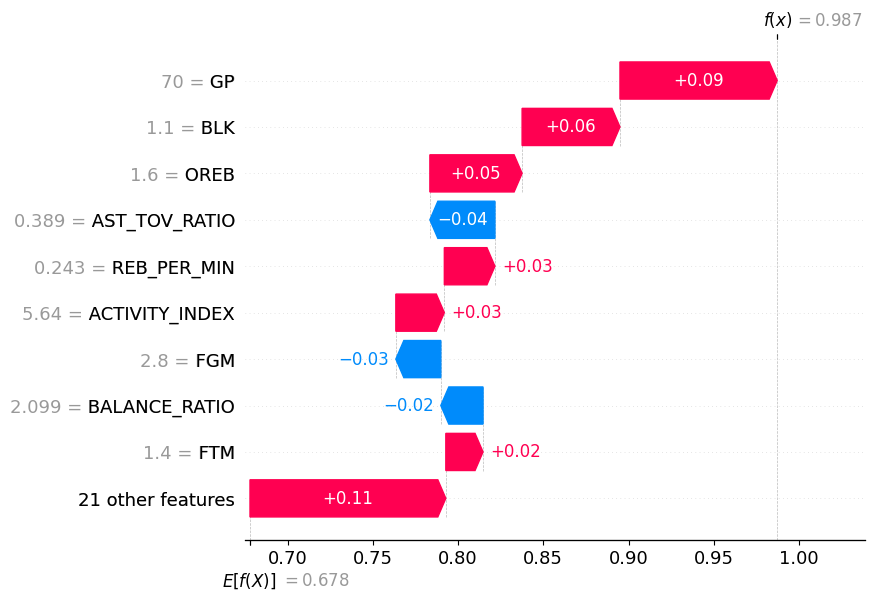

In [38]:
shap.plots.waterfall(shap_expl[0])

La valeur de départ est 0.678 et on peut voir les valeurs incrémentées et contributions de chaque variable à la prédiction. Pour cette observation, les colonnes GP, BLK et OREB apparaissent être les plus influentes dans la valeur prédite.